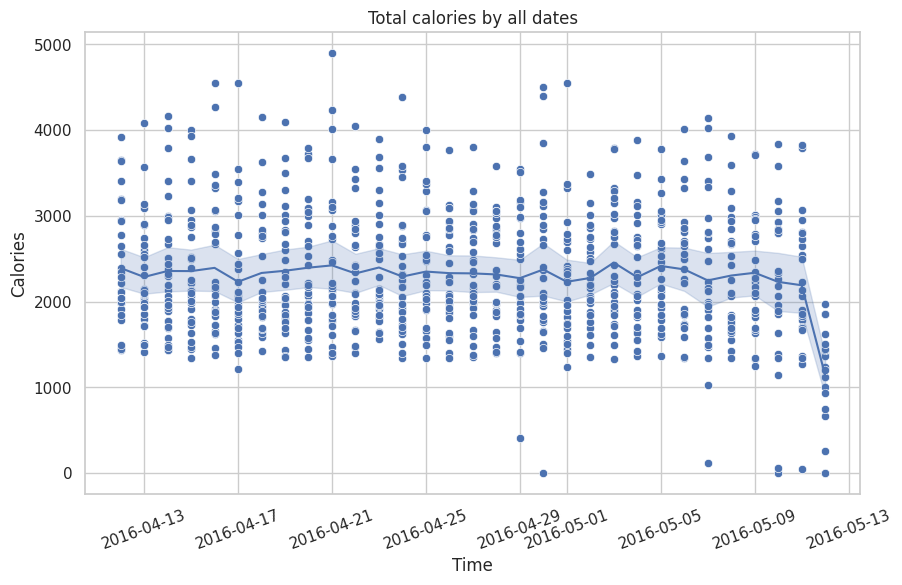

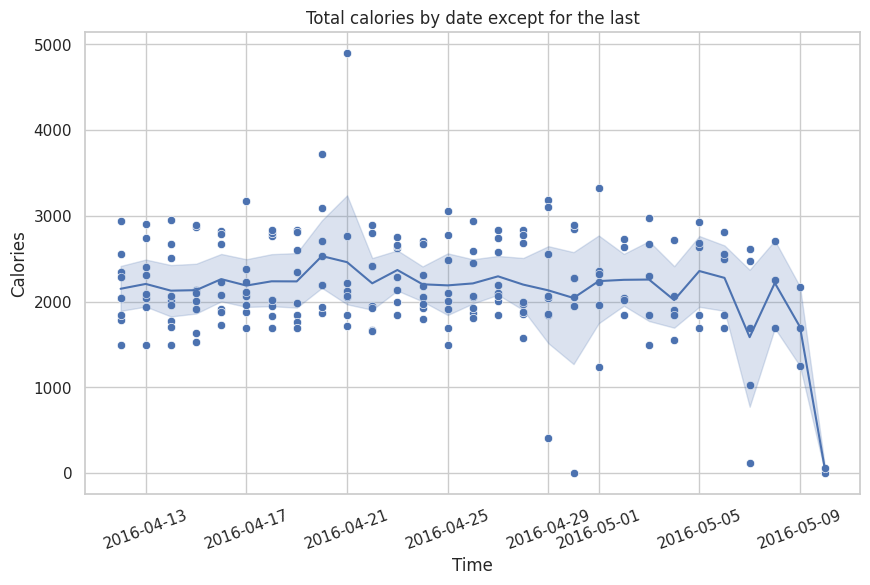

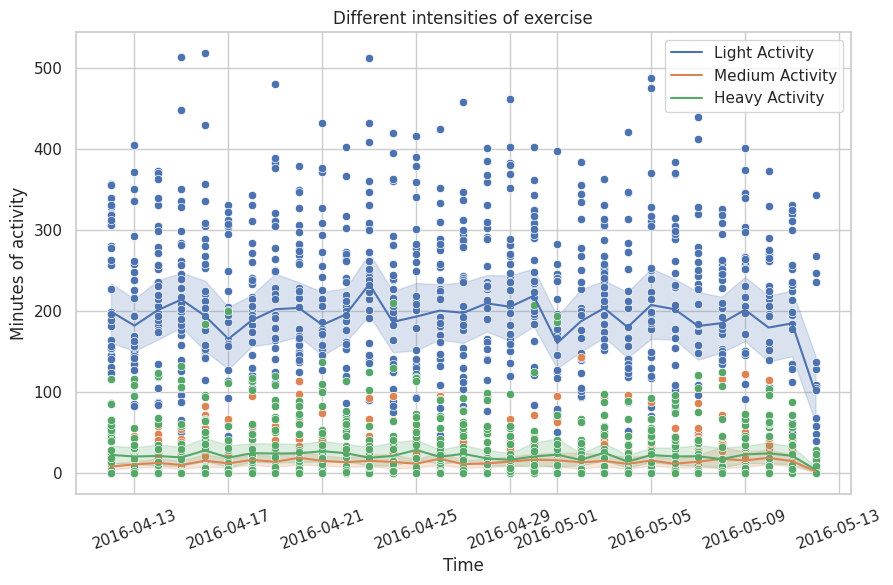

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, geom_point, geom_smooth, theme_light, theme, element_text, coord_cartesian, labs
from plotnine.data import economics
from datetime import datetime
from mizani.formatters import date_format
import seaborn as sns
from matplotlib.gridspec import GridSpec



# Read data
data_files = [
    "dailyActivity_merged.csv",
    "dailyCalories_merged.csv",
    "dailyIntensities_merged.csv",
    "dailySteps_merged.csv",
    "heartrate_seconds_merged.csv",
    "hourlyCalories_merged.csv",
    "hourlyIntensities_merged.csv",
    "hourlySteps_merged.csv"
]

data_list = [pd.read_csv(file) for file in data_files]

d_activity, d_calories, d_intensities, d_steps, s_heartrate, h_calories, h_intensities, h_steps = data_list

# Data cleaning and transformation
d_activity["ActivityDate"] = pd.to_datetime(d_activity["ActivityDate"], format="%m/%d/%Y")
d_activity["Id"] = d_activity["Id"].astype(str)

h_intensities["ActivityHour"] = pd.to_datetime(h_intensities["ActivityHour"], format="%m/%d/%Y %I:%M:%S %p")
h_intensities["Time"] = h_intensities["ActivityHour"].dt.strftime("%H:%M:%S")
h_intensities["Date"] = h_intensities["ActivityHour"].dt.date
h_intensities["Id"] = h_intensities["Id"].astype(str)
h_intensities.drop(columns=["ActivityHour"], inplace=True)

active_people = d_activity.loc[d_activity["ActivityDate"] > '2016-05-10', "Id"].unique()

activity_in_use = d_activity[d_activity["Id"].isin(active_people)]
activity_not_in_use = d_activity[~d_activity["Id"].isin(active_people)]
non_active_people = d_activity[~d_activity["Id"].isin(active_people)]["Id"].unique()


# Function to create a time series plot
def create_time_series_plot(data, y_var, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x="ActivityDate", y=y_var)
    sns.lineplot(data=data, x="ActivityDate", y=y_var)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(y_var)
    plt.xticks(rotation=20)
    plt.show()

create_time_series_plot(d_activity, "Calories", "Total calories by all dates")
create_time_series_plot(activity_not_in_use, "Calories", "Total calories by date except for the last")

# Function to create an intensity plot
def create_intensity_plot(data, y_vars, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x="ActivityDate", y=y_vars[0], label="Light Activity")
    sns.scatterplot(data=data, x="ActivityDate", y=y_vars[0])
    sns.lineplot(data=data, x="ActivityDate", y=y_vars[1], label="Medium Activity")
    sns.scatterplot(data=data, x="ActivityDate", y=y_vars[1])
    sns.lineplot(data=data, x="ActivityDate", y=y_vars[2], label="Heavy Activity")
    sns.scatterplot(data=data, x="ActivityDate", y=y_vars[2])
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Minutes of activity")
    plt.xticks(rotation=20)
    plt.legend()
    plt.show()

create_intensity_plot(d_activity, ["LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"], "Different intensities of exercise")




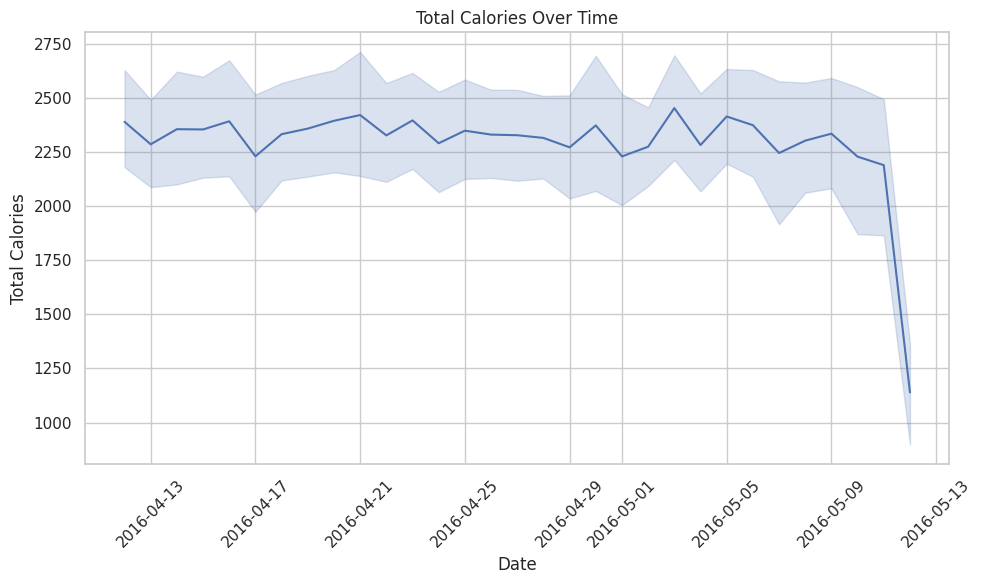

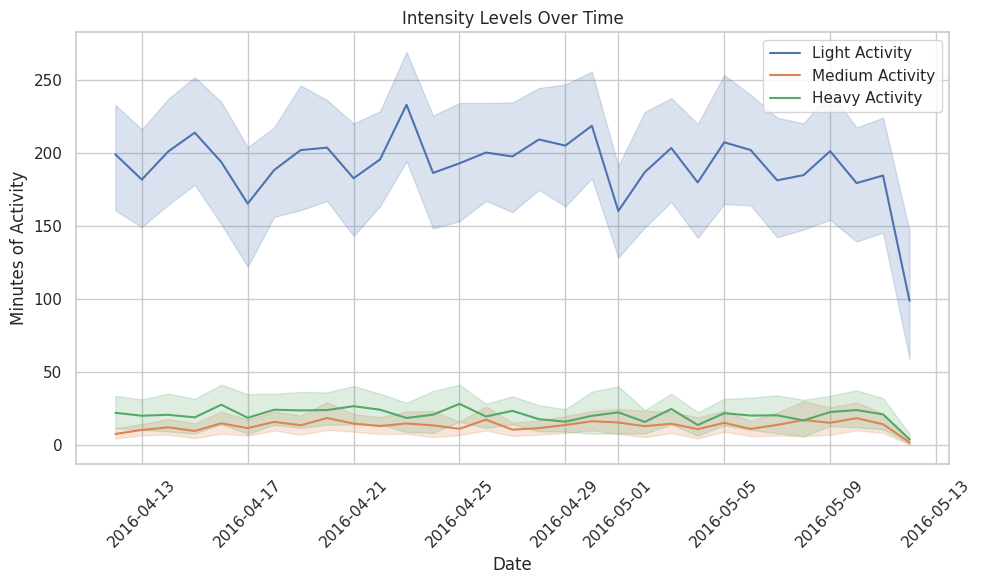

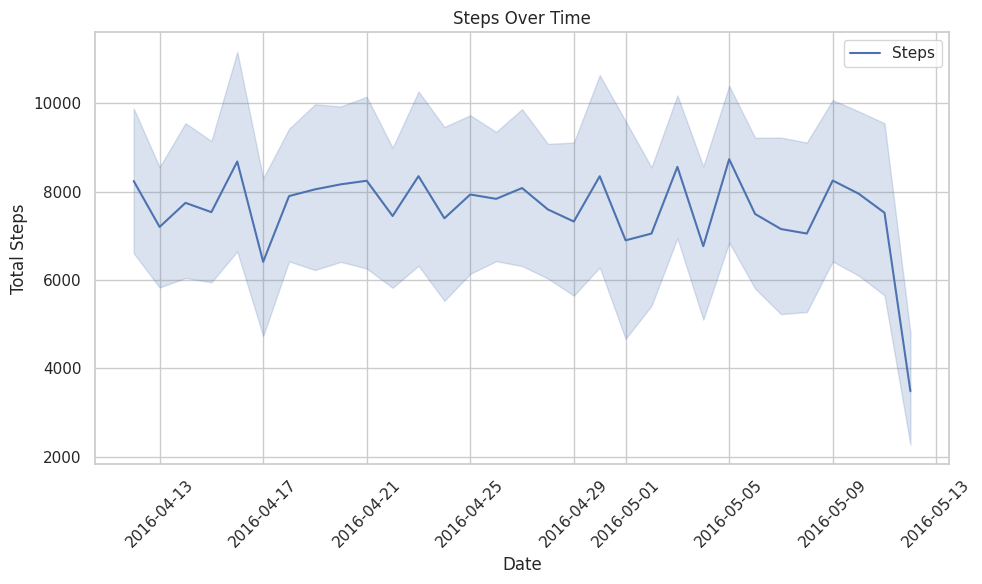

<ipython-input-10-58f22373b29b>:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


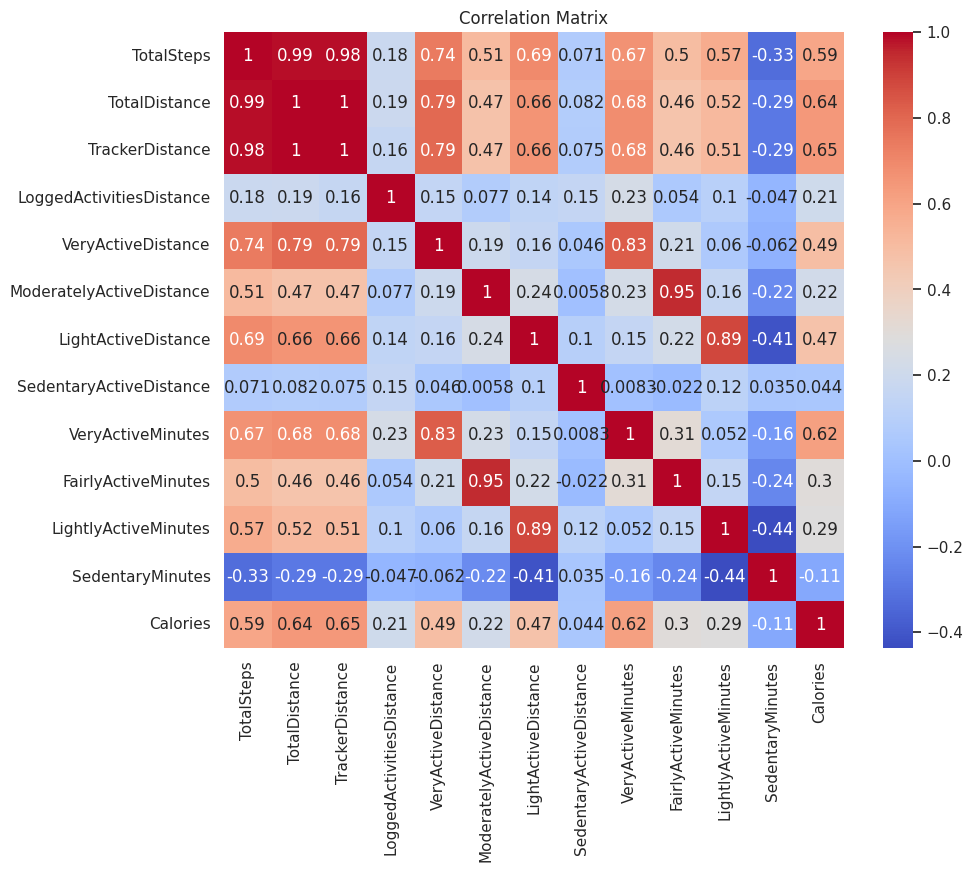

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=d_activity, x="ActivityDate", y="Calories")
plt.title("Total Calories Over Time")
plt.xlabel("Date")
plt.ylabel("Total Calories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Different Intensity Levels Over Time
intensity_vars = ["LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=d_activity, x="ActivityDate", y=intensity_vars[0], label="Light Activity")
sns.lineplot(data=d_activity, x="ActivityDate", y=intensity_vars[1], label="Medium Activity")
sns.lineplot(data=d_activity, x="ActivityDate", y=intensity_vars[2], label="Heavy Activity")
plt.title("Intensity Levels Over Time")
plt.xlabel("Date")
plt.ylabel("Minutes of Activity")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Steps Over Time (if available)
steps_data = d_steps.copy()  # Replace this with your actual steps data
steps_data["ActivityDay"] = pd.to_datetime(steps_data["ActivityDay"])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=steps_data, x="ActivityDay", y="StepTotal", label="Steps")
plt.title("Steps Over Time")
plt.xlabel("Date")
plt.ylabel("Total Steps")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Correlation Analysis (calculate correlations and visualize if needed)
# Add code here to calculate correlations and create visualizations if needed
# For example:
correlation_matrix = d_activity.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

hr_data = s_heartrate.copy()


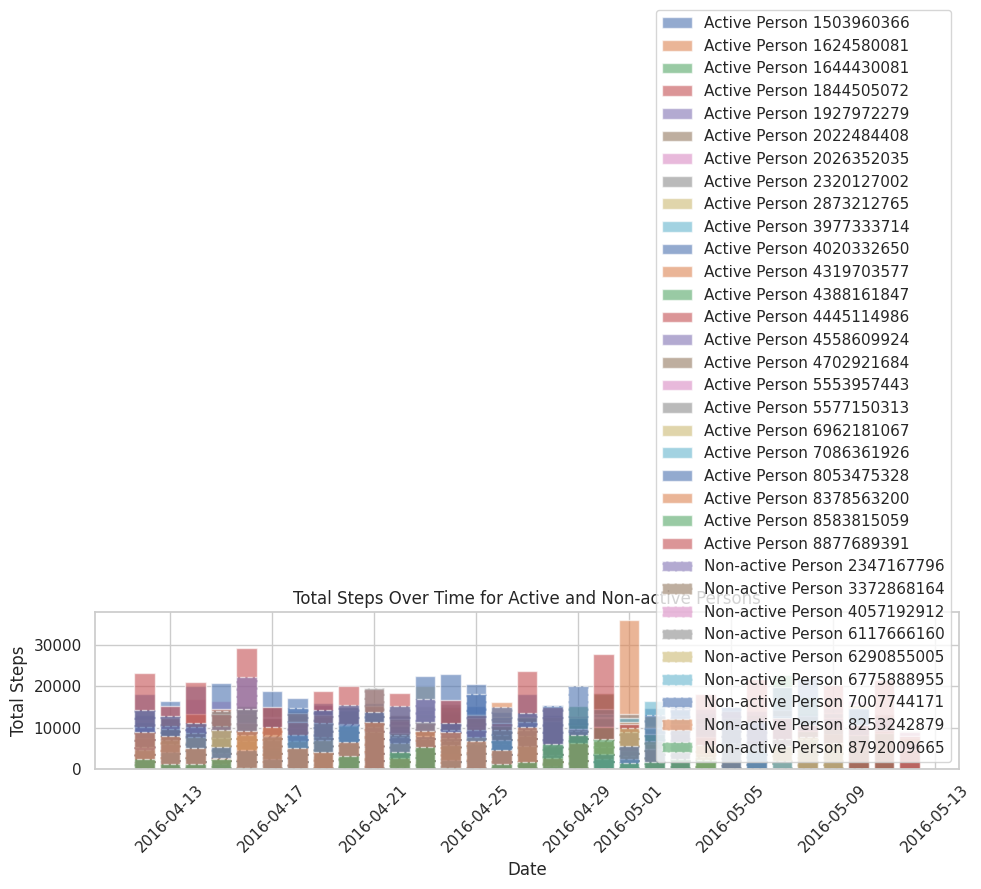

In [11]:
plt.figure(figsize=(10, 6))

# Active persons
for person_id in active_people:
    person_data = d_activity[d_activity["Id"] == person_id]
    plt.bar(person_data["ActivityDate"], person_data["TotalSteps"], label=f"Active Person {person_id}", alpha=0.6)

# Non-active persons
for person_id in non_active_people:
    person_data = d_activity[d_activity["Id"] == person_id]
    plt.bar(person_data["ActivityDate"], person_data["TotalSteps"], label=f"Non-active Person {person_id}", alpha=0.6, linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Total Steps")
plt.title("Total Steps Over Time for Active and Non-active Persons")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


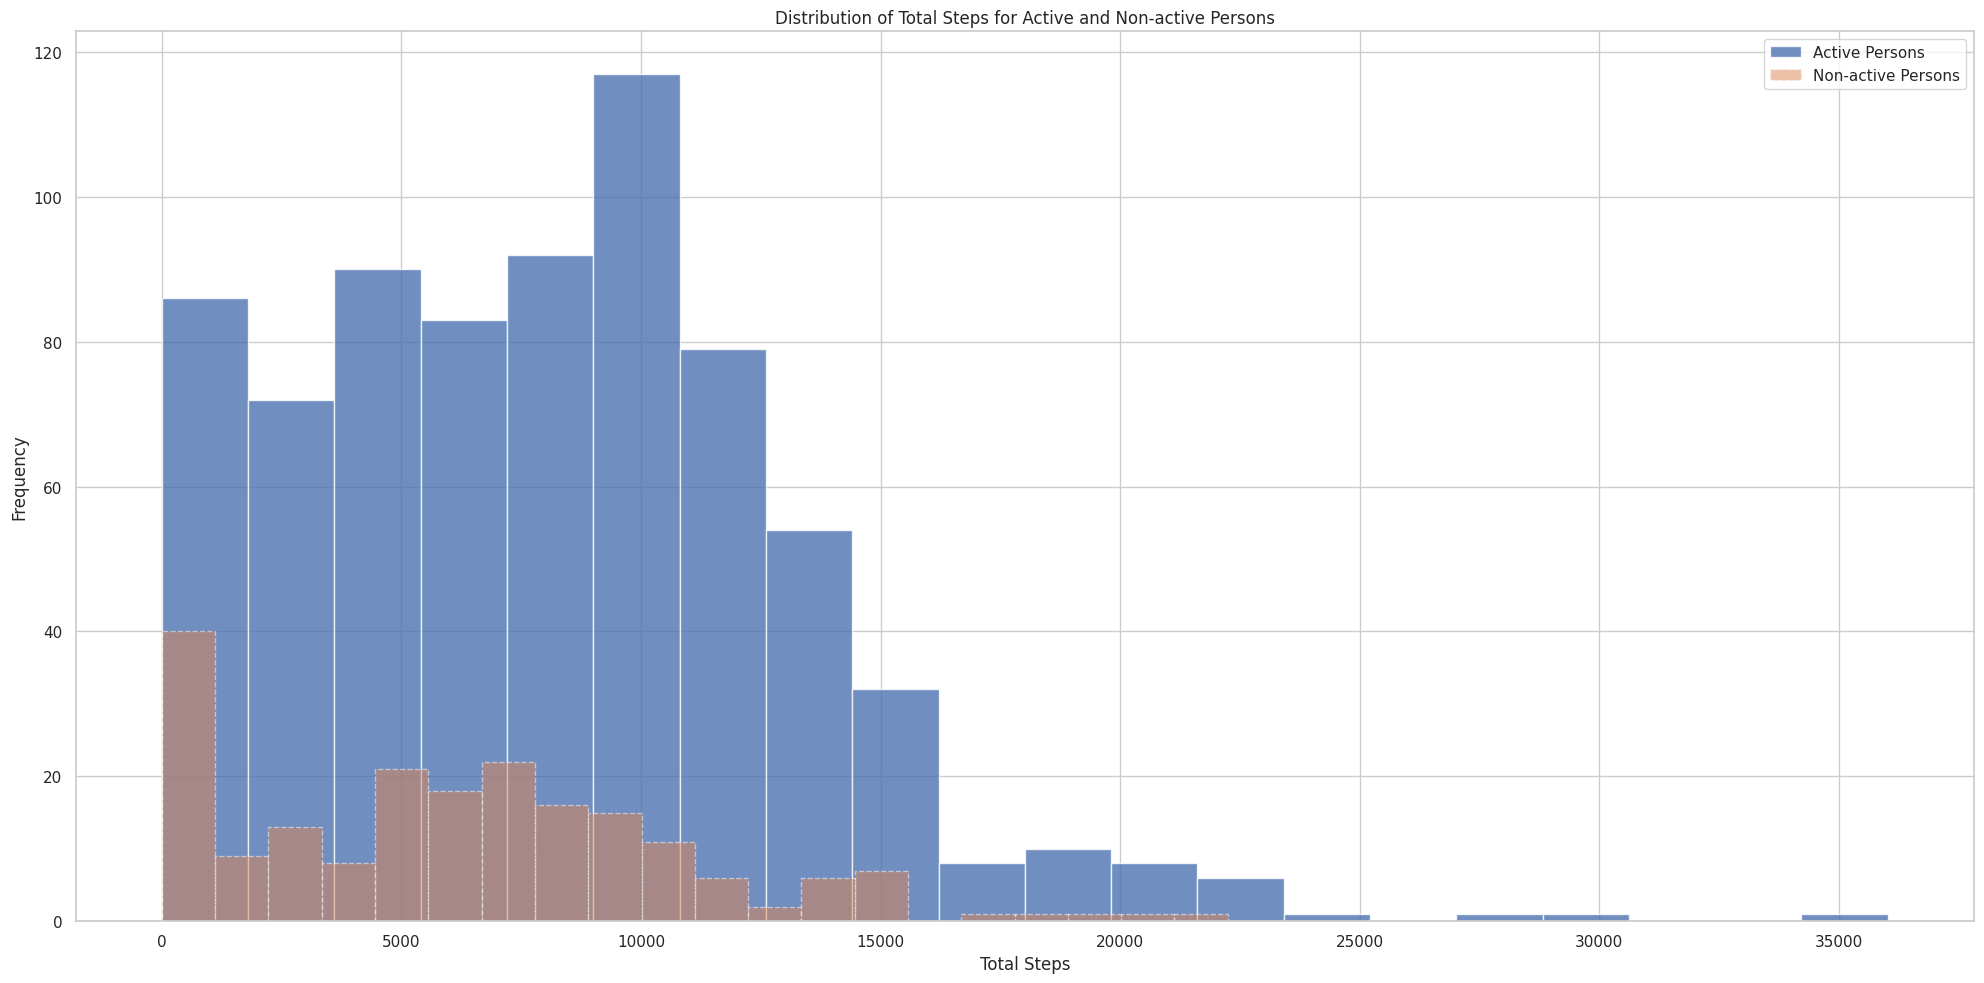

In [12]:


plt.figure(figsize=(20, 10))

# Active persons
active_data = d_activity[d_activity["Id"].isin(active_people)]
plt.hist(active_data["TotalSteps"], bins=20, alpha=0.8, label="Active Persons")

# Non-active persons
non_active_data = d_activity[d_activity["Id"].isin(non_active_people)]
plt.hist(non_active_data["TotalSteps"], bins=20, alpha=0.5, label="Non-active Persons", linestyle='dashed')

plt.xlabel("Total Steps")
plt.ylabel("Frequency")
plt.title("Distribution of Total Steps for Active and Non-active Persons")
plt.legend()
plt.tight_layout()
plt.show()


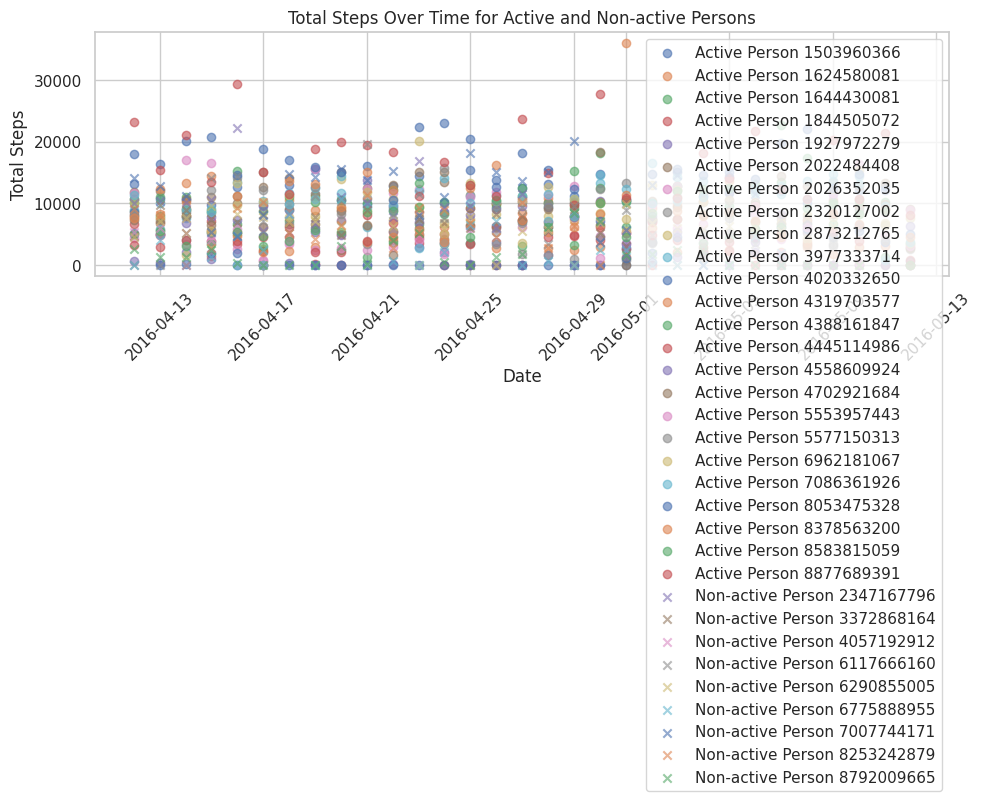

In [13]:
plt.figure(figsize=(10, 6))

# Active persons
for person_id in active_people:
    person_data = d_activity[d_activity["Id"] == person_id]
    plt.scatter(person_data["ActivityDate"], person_data["TotalSteps"], label=f"Active Person {person_id}", alpha=0.6)

# Non-active persons
for person_id in non_active_people:
    person_data = d_activity[d_activity["Id"] == person_id]
    plt.scatter(person_data["ActivityDate"], person_data["TotalSteps"], label=f"Non-active Person {person_id}", alpha=0.6, marker='x')

plt.xlabel("Date")
plt.ylabel("Total Steps")
plt.title("Total Steps Over Time for Active and Non-active Persons")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

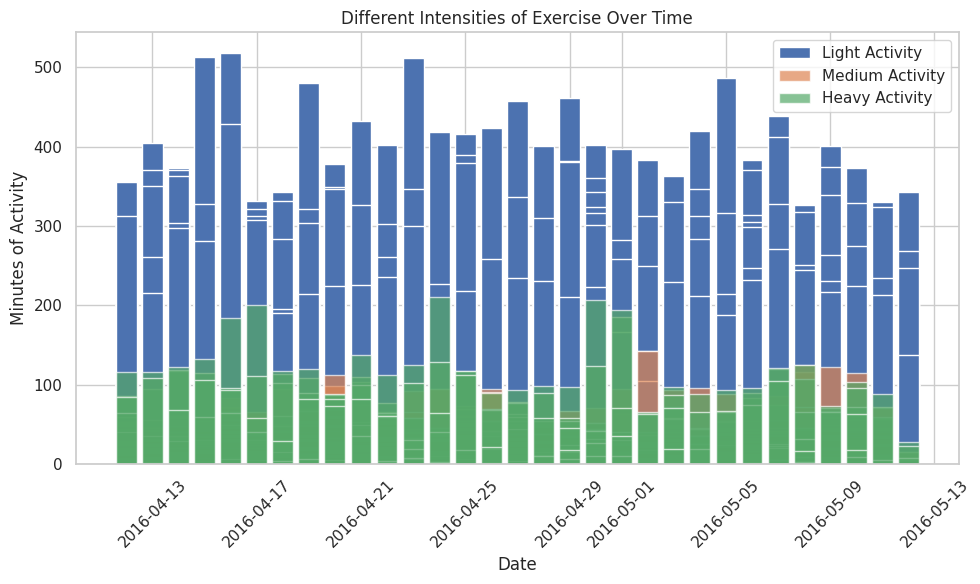

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(d_activity["ActivityDate"], d_activity["LightlyActiveMinutes"], label="Light Activity")
plt.bar(d_activity["ActivityDate"], d_activity["FairlyActiveMinutes"], label="Medium Activity", alpha=0.7)
plt.bar(d_activity["ActivityDate"], d_activity["VeryActiveMinutes"], label="Heavy Activity", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Minutes of Activity")
plt.title("Different Intensities of Exercise Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

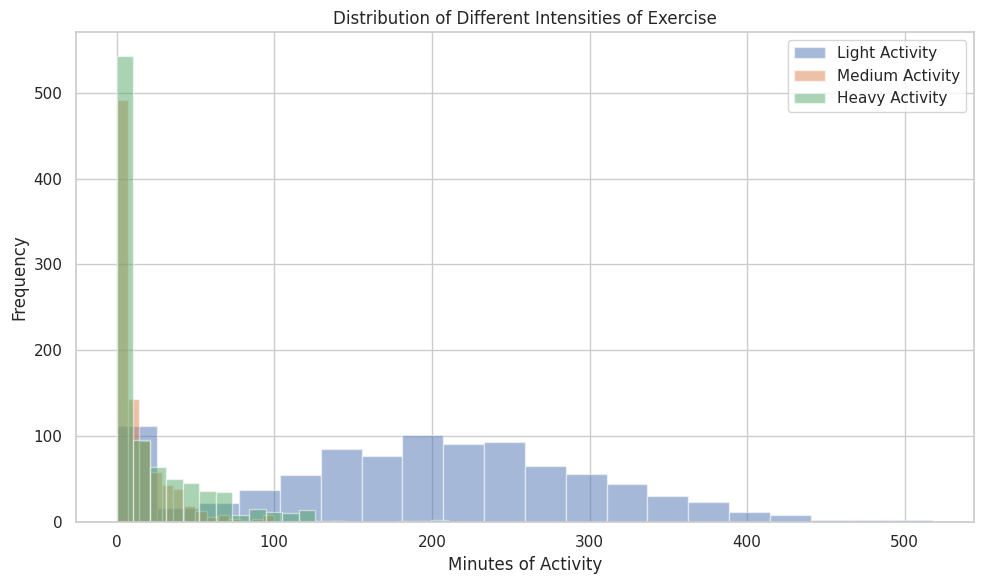

In [15]:

plt.figure(figsize=(10, 6))
plt.hist(d_activity["LightlyActiveMinutes"], bins=20, alpha=0.5, label="Light Activity")
plt.hist(d_activity["FairlyActiveMinutes"], bins=20, alpha=0.5, label="Medium Activity")
plt.hist(d_activity["VeryActiveMinutes"], bins=20, alpha=0.5, label="Heavy Activity")
plt.xlabel("Minutes of Activity")
plt.ylabel("Frequency")
plt.title("Distribution of Different Intensities of Exercise")
plt.legend()
plt.tight_layout()
plt.show()

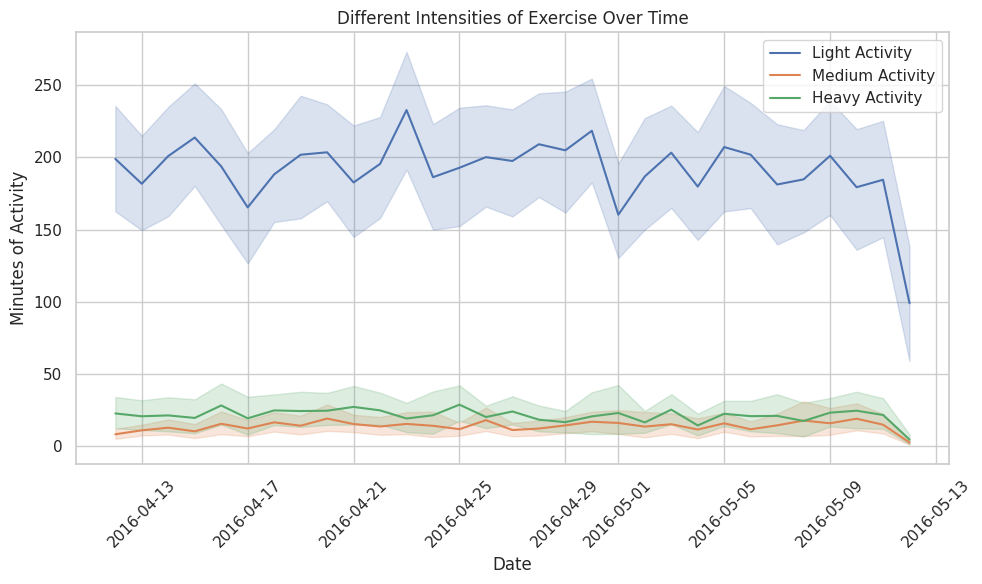

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=d_activity, x="ActivityDate", y="LightlyActiveMinutes", label="Light Activity")
sns.lineplot(data=d_activity, x="ActivityDate", y="FairlyActiveMinutes", label="Medium Activity")
sns.lineplot(data=d_activity, x="ActivityDate", y="VeryActiveMinutes", label="Heavy Activity")
plt.xlabel("Date")
plt.ylabel("Minutes of Activity")
plt.title("Different Intensities of Exercise Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

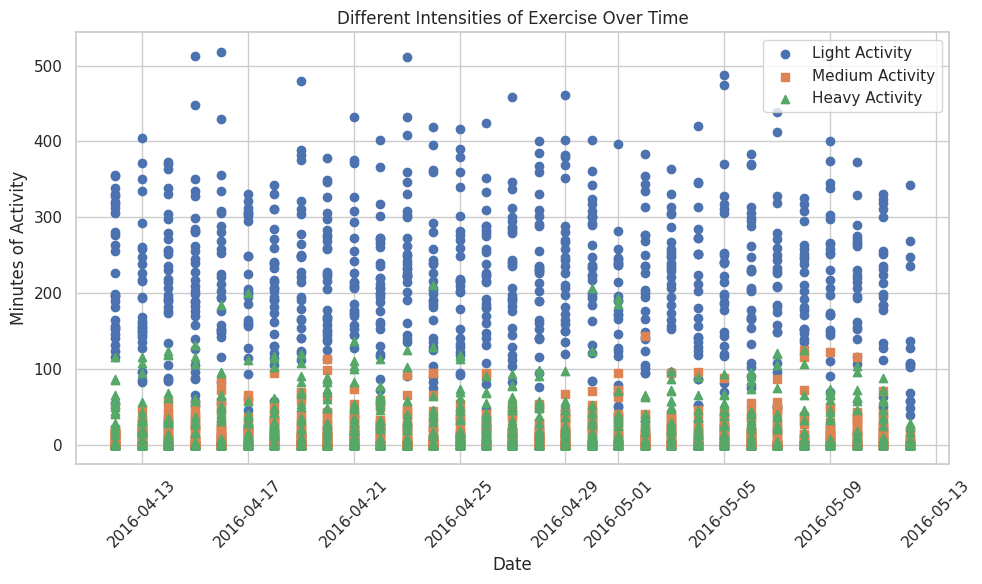

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(d_activity["ActivityDate"], d_activity["LightlyActiveMinutes"], label="Light Activity", marker="o")
plt.scatter(d_activity["ActivityDate"], d_activity["FairlyActiveMinutes"], label="Medium Activity", marker="s")
plt.scatter(d_activity["ActivityDate"], d_activity["VeryActiveMinutes"], label="Heavy Activity", marker="^")
plt.xlabel("Date")
plt.ylabel("Minutes of Activity")
plt.title("Different Intensities of Exercise Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

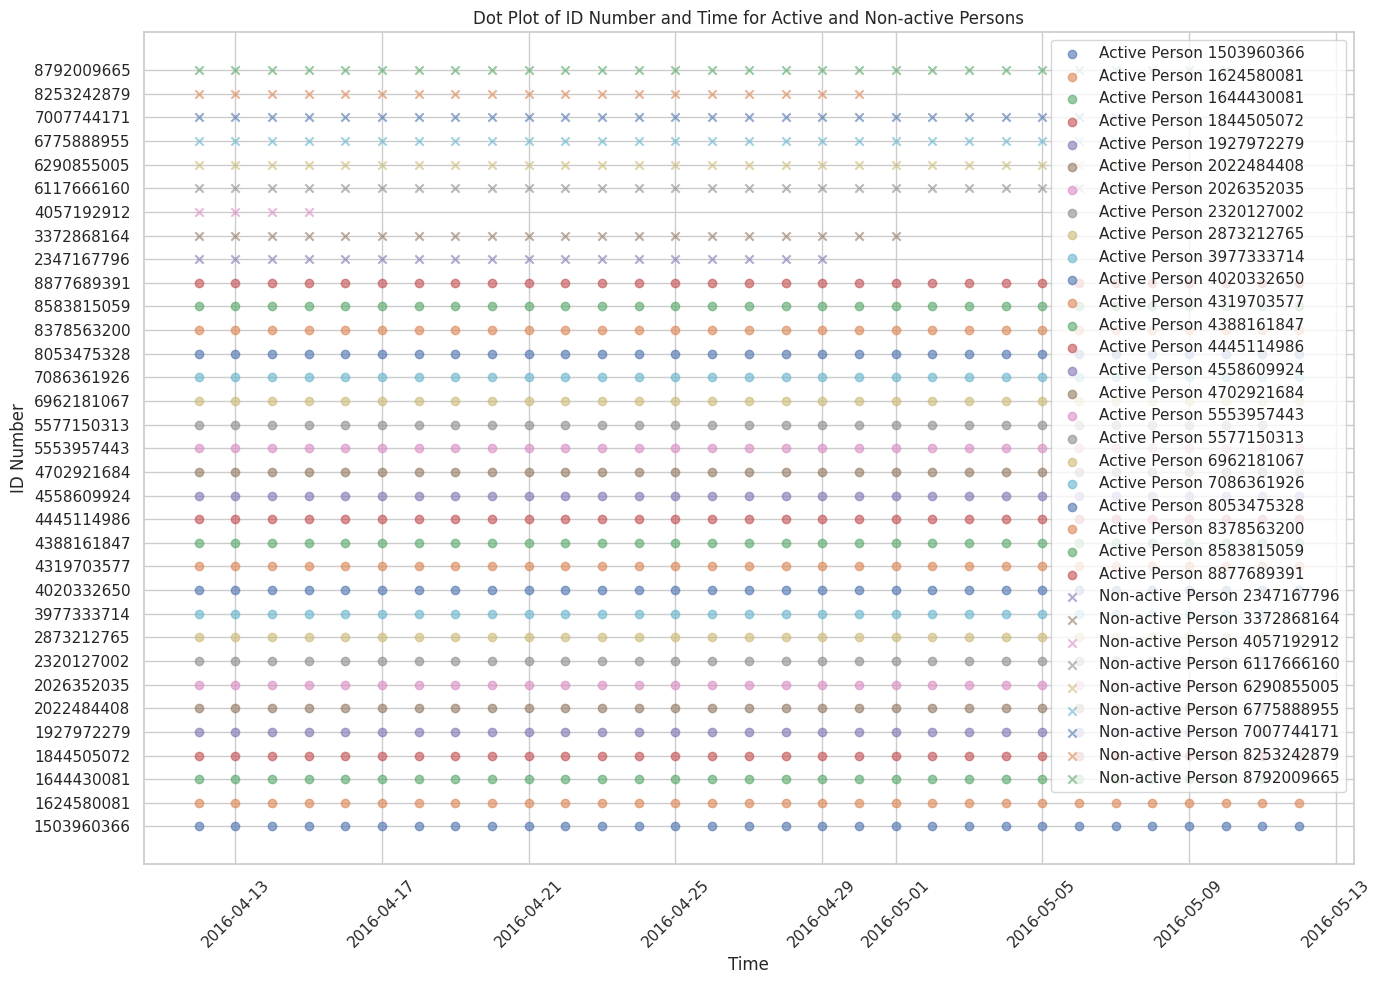

In [18]:
plt.figure(figsize=(14, 10))

# Active persons
for person_id in active_people:
    person_data = d_activity[d_activity["Id"] == person_id]
    plt.scatter(person_data["ActivityDate"], [person_id] * len(person_data), label=f"Active Person {person_id}", alpha=0.6)

# Non-active persons
for person_id in non_active_people:
    person_data = d_activity[d_activity["Id"] == person_id]
    plt.scatter(person_data["ActivityDate"], [person_id] * len(person_data), label=f"Non-active Person {person_id}", alpha=0.6, marker='x')

plt.xlabel("Time")
plt.ylabel("ID Number")
plt.title("Dot Plot of ID Number and Time for Active and Non-active Persons")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# In this plot, the x-axis represents time (ActivityDate) and the y-axis represents the ID number of the person. Each point represents an activity record for a person, with the color and marker style distinguishing between active and non-active individuals.





